In [1]:
import up42

In [2]:
up42.authenticate(cfg_file="config.json", env="dev")

2020-05-13 18:41:00,031 - up42.auth - INFO - Got credentials from config file.
2020-05-13 18:41:00,370 - up42.auth - INFO - Authentication with UP42 successful!


In [3]:
project = up42.initialize_project()
S1_SNAP_project = up42.initialize_project()
project

2020-05-13 18:41:15,963 - up42 - INFO - Working on Project with project_id 83401f4f-f0f0-441f-92ae-a8b7ac5ce0b1
2020-05-13 18:41:16,454 - up42 - INFO - Working on Project with project_id 83401f4f-f0f0-441f-92ae-a8b7ac5ce0b1


Project(project_id=83401f4f-f0f0-441f-92ae-a8b7ac5ce0b1, auth=UP42ProjectAuth(project_id=83401f4f-f0f0-441f-92ae-a8b7ac5ce0b1, env=dev), info={'id': '83401f4f-f0f0-441f-92ae-a8b7ac5ce0b1', 'displayId': '83401f4f', 'createdAt': '2020-05-05T11:33:04.895Z', 'updatedAt': '2020-05-05T11:33:04.895Z', 'name': 'Test Onboarding', 'description': ''})

In [4]:
# Create workflow and check available blocks and data
workflow = S1_SNAP_project.create_workflow(name="S1-GRD_SNAP", 
                                   use_existing=True)
print(up42.get_blocks(basic=True))

2020-05-13 18:41:17,539 - up42.project - INFO - Getting existing workflows in project ...
2020-05-13 18:41:18,038 - up42.project - INFO - Got 3 workflows for project 83401f4f-f0f0-441f-92ae-a8b7ac5ce0b1.
100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
2020-05-13 18:41:19,491 - up42.project - INFO - Using existing workflow: S1-GRD_SNAP, f721e66c-52be-43ce-b8b6-2ff6f3c2cc1c.
2020-05-13 18:41:20,230 - up42.tools - INFO - Getting blocks name and id, use basic=False for all block details.


{'tiling': 'd350aa0b-ac31-4021-bbe6-fd8da366740a', 'oneatlas-spot-aoiclipped': '0f15e07f-efcc-4598-939b-18aade349c57', 'oneatlas-pleiades-aoiclipped': 'f026874d-e95e-4293-b811-7667130e054d', 'sobloo-s1-grd-fullscene': '4524e2de-c780-488d-9818-fe68dad9f095', 'sobloo-s2-l1c-fullscene': '604988cb-8252-4161-bf28-f6fb63d7371c', 'snap-polarimetric': '320158d6-8f93-4484-a828-e1fb64f677ff', 'sentinelhub-s2-aoiclipped': 'c4758545-4b74-4318-ae1f-d5ba72f234ca', 'sentinelhub-landsat8-aoiclipped': 'e0b133ae-7b9c-435c-99ac-c4527cc8d9cf', 'sobloo-s1-slc-fullscene': 'cf822545-c73c-467b-8f43-5311dbefe03f', 'nasa-modis': '61279eb8-02e1-4b7a-ac3d-1f62d19d3484', 's2-superresolution': '4872fef8-aec8-4dec-adcb-560ee4430a2b', 'oneatlas-pleiades-fullscene': '8487adcd-a4d7-4cb7-b826-75a533e1f330', 'oneatlas-spot-fullscene': 'aa62113f-0dd1-40a3-a004-954c9d087071', 'data-conversion': '470eedda-5f62-433c-8562-98eb8783af87', 'pansharpen': '2f24c662-c129-409f-a7c3-afa16a4c78cb', 'sobloo-s1-grd-aoiclipped': 'a956166

In [5]:
input_tasks= ['sobloo-s1-grd-fullscene', 'snap-polarimetric']
workflow.add_workflow_tasks(input_tasks=input_tasks)
workflow.get_parameters_info()

2020-05-13 18:41:22,399 - up42.workflow - INFO - Added tasks to workflow: [{'name': 'sobloo-s1-grd-fullscene:1', 'parentName': None, 'blockId': '4524e2de-c780-488d-9818-fe68dad9f095'}, {'name': 'snap-polarimetric:1', 'parentName': 'sobloo-s1-grd-fullscene:1', 'blockId': '320158d6-8f93-4484-a828-e1fb64f677ff'}]
2020-05-13 18:41:22,956 - up42.workflow - INFO - Got 2 tasks/blocks in workflow f721e66c-52be-43ce-b8b6-2ff6f3c2cc1c.


{'sobloo-s1-grd-fullscene:1': {'ids': {'type': 'array', 'default': None},
  'bbox': {'type': 'array', 'default': None},
  'time': {'type': 'dateRange',
   'default': '2018-01-01T00:00:00+00:00/2020-12-31T23:59:59+00:00'},
  'limit': {'type': 'integer', 'default': 1, 'minimum': 1},
  'contains': {'type': 'geometry'},
  'intersects': {'type': 'geometry'},
  'time_series': {'type': 'array', 'default': None},
  'orbit_direction': {'type': 'string', 'default': None},
  'acquisition_mode': {'type': 'string', 'default': None}},
 'snap-polarimetric:1': {'bbox': {'type': 'array', 'default': None},
  'mask': {'type': 'array',
   'items': {'enum': ['land', 'sea'], 'type': 'string'},
   'default': None},
  'contains': {'type': 'geometry', 'default': None},
  'intersects': {'type': 'geometry', 'default': None},
  'clip_to_aoi': {'type': 'boolean', 'default': False},
  'tcorrection': {'type': 'boolean', 'default': True},
  'linear_to_db': {'type': 'boolean', 'default': True},
  'polarisations': {'ty

In [6]:
# Define the aoi (get_example_aoi) and input parameters of the workflow to run it.
#aoi = [13.375966, 52.515068, 13.378314, 52.516639]

input_parameters = {
  "sobloo-s1-grd-fullscene:1": {
    "bbox": [13.375966, 52.515068, 13.378314, 52.516639],
    "ids": None,
    "time": "2018-01-01T00:00:00+00:00/2020-12-31T23:59:59+00:00",
    "limit": 1,
    "zoom_level": 14,
  },
    "snap-polarimetric:1": {
    "bbox": [13.375966, 52.515068, 13.378314, 52.516639],
    "mask": None,
    "contains": None,
    "intersects": None,
    "clip_to_aoi": True,
    "tcorrection": True,
    "linear_to_db": True,
    "polarisations": [
        "VV"
   ],
   "speckle_filter": True,
   "calibration_band": [
         "sigma"
   ]
  }
}

input_parameters

{'sobloo-s1-grd-fullscene:1': {'bbox': [13.375966,
   52.515068,
   13.378314,
   52.516639],
  'ids': None,
  'time': '2018-01-01T00:00:00+00:00/2020-12-31T23:59:59+00:00',
  'limit': 1,
  'zoom_level': 14},
 'snap-polarimetric:1': {'bbox': [13.375966, 52.515068, 13.378314, 52.516639],
  'mask': None,
  'contains': None,
  'intersects': None,
  'clip_to_aoi': True,
  'tcorrection': True,
  'linear_to_db': True,
  'polarisations': ['VV'],
  'speckle_filter': True,
  'calibration_band': ['sigma']}}

In [7]:
# Run a test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters=input_parameters, track_status=True)
test_results = test_job.get_results_json()
print(test_results)

2020-05-13 18:41:25,090 - up42.workflow - INFO - +++++++++++++++++++++++++++++++++
2020-05-13 18:41:25,090 - up42.workflow - INFO - Running this job as Test Query...
2020-05-13 18:41:25,091 - up42.workflow - INFO - +++++++++++++++++++++++++++++++++
2020-05-13 18:41:25,092 - up42.workflow - INFO - Selected input_parameters: {'sobloo-s1-grd-fullscene:1': {'bbox': [13.375966, 52.515068, 13.378314, 52.516639], 'ids': None, 'time': '2018-01-01T00:00:00+00:00/2020-12-31T23:59:59+00:00', 'limit': 1, 'zoom_level': 14}, 'snap-polarimetric:1': {'bbox': [13.375966, 52.515068, 13.378314, 52.516639], 'mask': None, 'contains': None, 'intersects': None, 'clip_to_aoi': True, 'tcorrection': True, 'linear_to_db': True, 'polarisations': ['VV'], 'speckle_filter': True, 'calibration_band': ['sigma']}, 'config': {'mode': 'DRY_RUN'}}.
2020-05-13 18:41:26,029 - up42.workflow - INFO - Created and running new job: 591e3b54-5213-4355-8ed0-4d50b6c00bbd.
2020-05-13 18:41:26,494 - up42.job - INFO - Tracking job sta

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'bbox': [12.307579, 52.168606, 16.666708, 54.078041], 'id': 'd703f8ee-c090-4241-bba0-89e7c701d02c', 'geometry': {'type': 'Polygon', 'coordinates': [[[16.152637, 52.168606], [16.666708, 53.660168], [12.686941, 54.078041], [12.307579, 52.583508], [16.152637, 52.168606]]]}, 'properties': {'attachments': [], 'visibility': {'deleted': False}, 'illumination': {}, 'production': {'levelCode': 'L1', 'ongoing': False, 'timeliness': 'Fast-24h'}, 'archive': {'offLine': False, 'filename': 'S1A_IW_GRDH_1SDV_20200513T051658_20200513T051723_032542_03C4E0_9874.SAFE', 'size': 1689, 'format': 'SAFE', 'onLine': False}, 'spatialCoverage': {'verticality': {}, 'geometry': {'geographicBoundingPolygon': {'coordinates': [[[16.152637, 52.168606], [16.666708, 53.660168], [12.686941, 54.078041], [12.307579, 52.583508], [16.152637, 52.168606]]], 'type': 'Polygon'}, 'global': False, 'centerPoint': {'lon': 14.457121960988575, 'lat': 53.12650390104146}}}, 

In [8]:
# Run the actual job.
job = workflow.run_job(input_parameters=input_parameters, track_status=True)

2020-05-13 18:44:55,649 - up42.workflow - INFO - Selected input_parameters: {'sobloo-s1-grd-fullscene:1': {'bbox': [13.375966, 52.515068, 13.378314, 52.516639], 'ids': None, 'time': '2018-01-01T00:00:00+00:00/2020-12-31T23:59:59+00:00', 'limit': 1, 'zoom_level': 14}, 'snap-polarimetric:1': {'bbox': [13.375966, 52.515068, 13.378314, 52.516639], 'mask': None, 'contains': None, 'intersects': None, 'clip_to_aoi': True, 'tcorrection': True, 'linear_to_db': True, 'polarisations': ['VV'], 'speckle_filter': True, 'calibration_band': ['sigma']}}.
2020-05-13 18:44:56,668 - up42.workflow - INFO - Created and running new job: a2500ebe-9063-44f4-b6ea-93d9f2a7269e.
2020-05-13 18:44:57,151 - up42.job - INFO - Tracking job status continuously, reporting every 30 seconds...
2020-05-13 18:45:30,571 - up42.job - INFO - Job is RUNNING! - a2500ebe-9063-44f4-b6ea-93d9f2a7269e
2020-05-13 18:46:03,512 - up42.job - INFO - Job is RUNNING! - a2500ebe-9063-44f4-b6ea-93d9f2a7269e
2020-05-13 18:46:36,468 - up42.job

2020-05-13 18:55:46,981 - up42.job - INFO - Downloading results of job a2500ebe-9063-44f4-b6ea-93d9f2a7269e
2020-05-13 18:55:46,983 - up42.job - INFO - Download directory: /Users/thais.bendixen/Projects/up42-py/examples/project_83401f4f-f0f0-441f-92ae-a8b7ac5ce0b1/job_a2500ebe-9063-44f4-b6ea-93d9f2a7269e
8it [00:00, 24456.58it/s]
2020-05-13 18:55:48,029 - up42.utils - INFO - Download successful of 2 files to output_directory '/Users/thais.bendixen/Projects/up42-py/examples/project_83401f4f-f0f0-441f-92ae-a8b7ac5ce0b1/job_a2500ebe-9063-44f4-b6ea-93d9f2a7269e': ['d703f8ee-c090-4241-bba0-89e7c701d02c.tif', 'data.json']


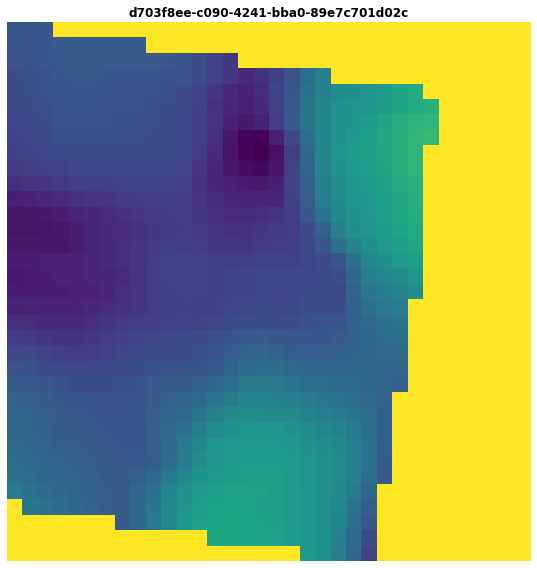

In [9]:
job.download_results()
job.plot_results()